In [2]:
# Problem Statement: Finding the class of iris flower using logistic classification algorithm.

In [3]:
# Data collection:

In [4]:
import numpy as np
import pandas as pd

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.drop('Id', axis= 1, inplace=True)

# Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
y=df['Species']
y.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [10]:
x=df.drop("Species",axis=1,inplace=True)
x

In [11]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

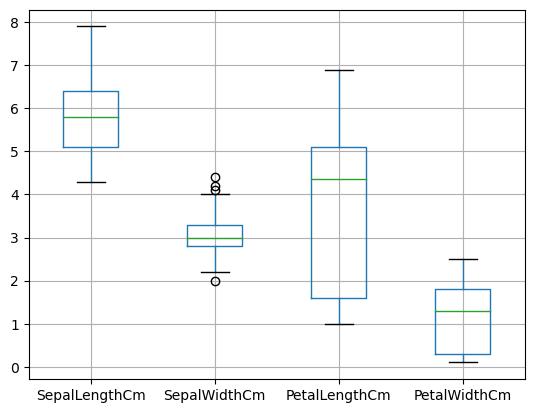

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
df.boxplot()
plt.show()

# Feature Engineering

In [13]:
df.columns 

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

####  SepalWidthCm

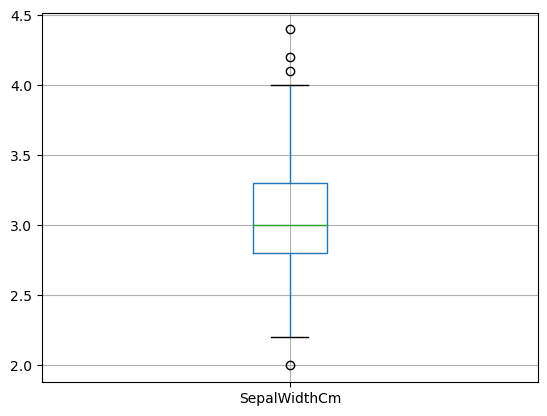

In [14]:
df.boxplot("SepalWidthCm")
plt.show()

In [15]:
q1 = df['SepalWidthCm'].quantile(0.25)
q2 = df['SepalWidthCm'].quantile(0.50)
q3 = df['SepalWidthCm'].quantile(0.75)
iqr = q3 - q1
upper_tail = q3 + 1.5 * iqr
lower_tail = q1 - 1.5 * iqr
median=df['SepalWidthCm'].median()
print("median : ",median)
print("upper_tail :", upper_tail)
print("lower_tail :", lower_tail)

median :  3.0
upper_tail : 4.05
lower_tail : 2.05


In [16]:
df[["SepalWidthCm"]].loc[df["SepalWidthCm"]<lower_tail]

,SepalWidthCm
60,2.0


In [17]:
df[["SepalWidthCm"]].loc[df["SepalWidthCm"]>upper_tail]

,SepalWidthCm
15,4.4
32,4.1
33,4.2


In [18]:
df.loc[(df['SepalWidthCm'] > upper_tail),'SepalWidthCm']  = upper_tail

In [19]:
df.loc[(df['SepalWidthCm'] < lower_tail),'SepalWidthCm'] = lower_tail

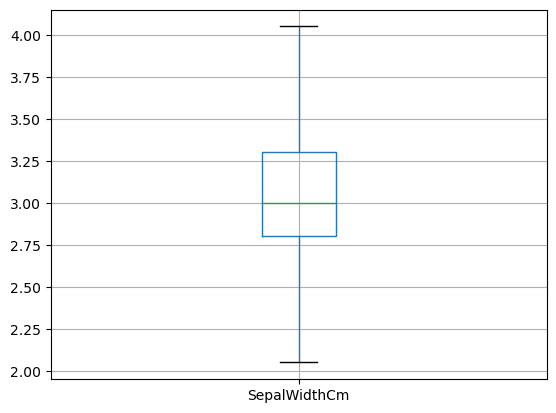

In [20]:
df.boxplot("SepalWidthCm")
plt.show()

# Model Building

In [21]:
x=df
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [22]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: Species
Non-Null Count  Dtype 
--------------  ----- 
150 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test =  train_test_split(x,y, test_size=0.3, random_state= 10, stratify=y)

In [25]:
logistic_model = LogisticRegression(multi_class= 'ovr')
logistic_model.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

# Model Evaluation

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score   #OR
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [28]:
# Training dataset
y_pred_train = logistic_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*50)

multi_cnf_matrix = multilabel_confusion_matrix(y_train, y_pred_train)
print("Multilabel Confusion Matrix\n",multi_cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy on training data: ",accuracy)
print("*"*50)

clf_report = classification_report(y_train, y_pred_train)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[35  0  0]
 [ 0 31  4]
 [ 0  2 33]]
**************************************************
Multilabel Confusion Matrix
 [[[70  0]
  [ 0 35]]

 [[68  2]
  [ 4 31]]

 [[66  4]
  [ 2 33]]]
**************************************************
Accuracy on trainin data:  0.9428571428571428
**************************************************
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        35
Iris-versicolor       0.94      0.89      0.91        35
 Iris-virginica       0.89      0.94      0.92        35

       accuracy                           0.94       105
      macro avg       0.94      0.94      0.94       105
   weighted avg       0.94      0.94      0.94       105



In [29]:
# Testing Accuracy
y_pred = logistic_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cnf_matrix)
print("*"*50)

multi_cnf_matrix = multilabel_confusion_matrix(y_test, y_pred)
print("Multilabel COnfusion Matrix\n",multi_cnf_matrix)
print("*"*50)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)
print("*"*50)

clf_report = classification_report(y_test, y_pred)
print("Classification Report:\n",clf_report)

Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]
**************************************************
Multilabel COnfusion Matrix
 [[[30  0]
  [ 0 15]]

 [[30  0]
  [ 1 14]]

 [[29  1]
  [ 0 15]]]
**************************************************
Accuracy:  0.9777777777777777
**************************************************
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.93      0.97        15
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



## Singal user input

In [30]:
x.head().T

,0,1,2,3,4
SepalLengthCm,5.1,4.9,4.7,4.6,5.0
SepalWidthCm,3.5,3.0,3.2,3.1,3.6
PetalLengthCm,1.4,1.4,1.3,1.5,1.4
PetalWidthCm,0.2,0.2,0.2,0.2,0.2


In [31]:
column_names = x.columns
column_names

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [32]:
SepalLengthCm = 4.7
SepalWidthCm = 3.2
PetalLengthCm = 1.3
PetalWidthCm = 0.2

In [33]:
json_data = {"column_names":list(column_names)}

In [35]:
import json
with open("iris.json", "w") as f:
    json.dump(json_data, f)

In [36]:
import pickle
with open("iris.pkl", "wb") as f:
    pickle.dump(logistic_model, f) 

In [37]:
test_array = np.zeros(len(x.columns))  

test_array[0] = SepalLengthCm
test_array[1] = SepalWidthCm
test_array[2] = PetalLengthCm
test_array[3] = PetalWidthCm
test_array

array([4.7, 3.2, 1.3, 0.2])

In [38]:
prediction = logistic_model.predict([test_array])[0]
prediction 

'Iris-setosa'